# Introduction

Explain...

# Idea

Explain what your idea is.

# Solution

## "Naive" GHZ State Generation

In [1]:
from qiskit import QuantumCircuit, execute, Aer

def generate_naive_ghz_state(qubit_amount):
    """Prepare a GHZ state on n qubits."""
    # Initialize a quantum circuit with n qubits
    qc = QuantumCircuit(qubit_amount)

    # Apply a Hadamard gate to the first qubit
    qc.h(0)

    # Apply a CNOT gate between the first qubit and each of the other qubits
    for i in range(1, qubit_amount):
        qc.cx(0, i)

    qc.measure_all()

    return qc

## Generalized GHZ State Generation

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

def generate_generalized_ghz_state(qubit_amount):
    total_qubit_amount = 2*qubit_amount-1
    
    qr = QuantumRegister(total_qubit_amount)
    cr = ClassicalRegister(total_qubit_amount)
    qc = QuantumCircuit(qr, cr)
    
    even_qubit_list = list(range(0,2*qubit_amount,2))
    odd_qubit_list = list(range(1,2*qubit_amount-1,2))
    
    # print(even_qubit_list, odd_qubit_list)
    
    qc.h(even_qubit_list)
    qc.cx(even_qubit_list[:-1], odd_qubit_list)
    qc.cx(even_qubit_list[1:], odd_qubit_list)
    
    qc.measure(qr[1::2], cr[1::2])
    
    # Measure and perform conditional operations
    n = total_qubit_amount
    
    for i in range(1, n, 2):
        with qc.if_test((cr[i], 1)):
            qc.x(list(range(i+1, n, 2)))
    
    qc.barrier()
    
    qc.measure(qr[::2], cr[::2])
    
    return qc

# generate_generalized_ghz_state(3).draw('mpl')

# Results

## Plotting

In [6]:
# =========== FUNCTION DEFINITIONS ===========
# Reference: https://qiskit.org/documentation/tutorials/simulators/2_device_noise_simulation.html

In [7]:
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

from qiskit.providers.fake_provider import FakeSherbrooke

def plot_noise(circ):
    # Fake Provider Backends
    device_backend = FakeSherbrooke()

    # vigo_simulator contains an approximate noise model consisting of:
    # - Single-qubit gate errors consisting of a single qubit depolarizing error followed by a single qubit thermal relaxation error.
    # - Two-qubit gate errors consisting of a two-qubit depolarizing error followed by single-qubit thermal relaxation errors on both qubits in the gate.
    # - Single-qubit readout errors on the classical bit value obtained from measurements on individual qubits.
    sim_vigo = AerSimulator.from_backend(device_backend)

    # Transpile the circuit for the noisy basis gates
    tcirc = transpile(circ, sim_vigo)

    # Execute noisy simulation and get counts
    result_noise = sim_vigo.run(tcirc, shots = 500).result()
    counts_noise = result_noise.get_counts(0)
    return counts_noise    

In [8]:
# =========== EXECUTION ===========

In [17]:
# VARIABLES
qubit_amount=3

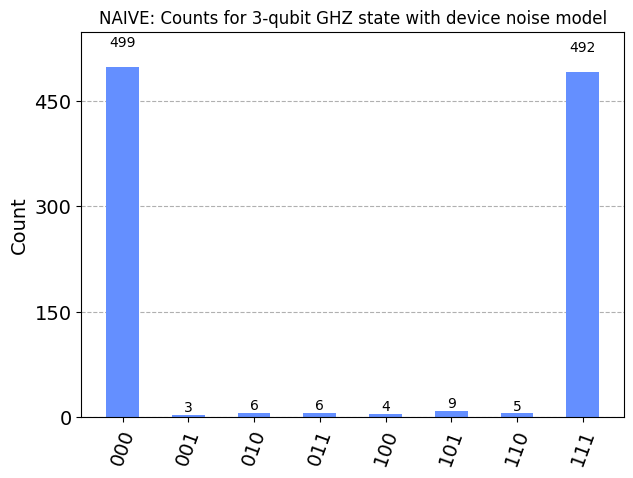

In [23]:
# PLOTTING: NOISE
circ = generate_naive_ghz_state(qubit_amount)
counts_noise=plot_noise(circ)
plot_histogram(counts_noise,
                   title=f"NAIVE: Counts for {qubit_amount}-qubit GHZ state with device noise model")


In [19]:
generalized_circ = generate_generalized_ghz_state(qubit_amount)
counts_noise=plot_noise(generalized_circ)

new_counts = {}
print(len(counts_noise))

32


{'010': 16, '101': 24, '001': 68, '011': 34, '100': 30, '110': 60, '111': 904, '000': 912}


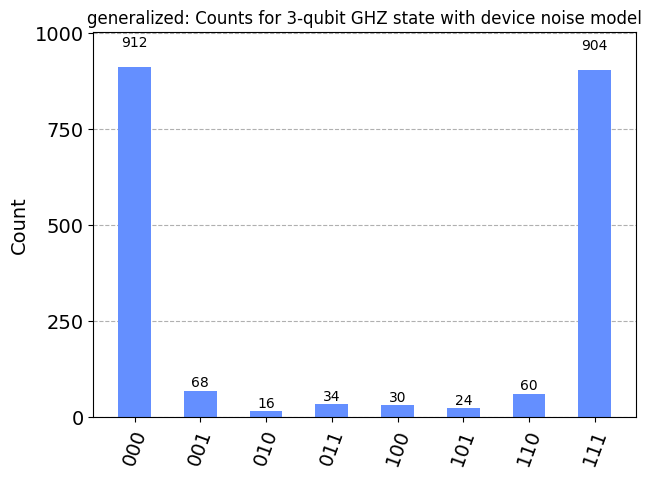

In [21]:
for el in counts_noise: 
    even_list = [el[i] for i in range(0, qubit_amount*2-1, 2)]
    try:
        new_counts["".join(even_list)] = new_counts["".join(even_list)] + counts_noise[el]
    except:
        new_counts["".join(even_list)] = counts_noise[el]
        
print(new_counts)
plot_histogram(new_counts,
                   title=f"generalized: Counts for {qubit_amount}-qubit GHZ state with device noise model")



In [22]:
print(len(new_counts))

8
